# Trees and ensembles

### Decisions trees
The following code, obtained and adapted from [scikit-learn](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html), illustrates some of the properties of trees.

We will use the iris dataset

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import graphviz 

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import roc_curve, auc

In [30]:
iris = load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier().fit(X, y)

Using the graphviz library, it is possible to visualize the constructed tree

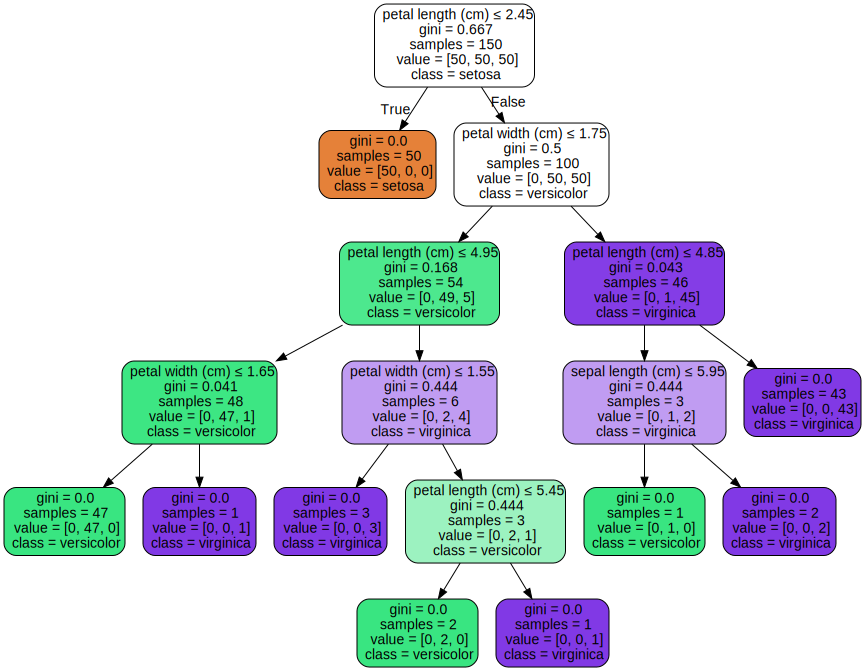

In [31]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

To illustrate the behaviour of the decision surfaces when using decision trees, now we will train our tree using two pairs of features at each time.

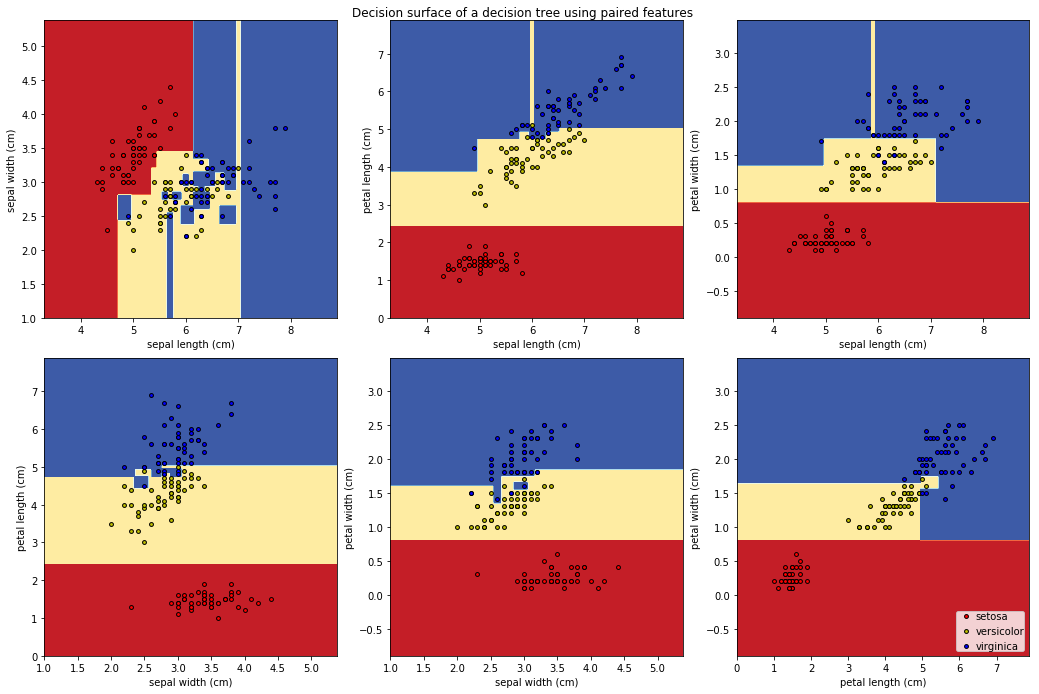

<Figure size 1080x720 with 0 Axes>

In [39]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
plt.rcParams['figure.figsize'] = [15, 10]
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.show()

**Exercise:** Try running the above code multiple times. Do the plots change?

### The XOR
Now we illustrate the XOR example using decision trees

In [41]:
X = np.ndarray(shape=(4,2), dtype=int)
X[0,0] = 0
X[0,1] = 0
X[1,0] = 0
X[1,1] = 1
X[2,0] = 1
X[2,1] = 0
X[3,0] = 1
X[3,1] = 1

y = [-1,1,1,-1] 
clf = DecisionTreeClassifier().fit(X, y)

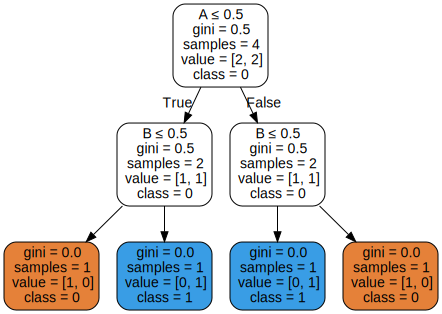

In [42]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['A', 'B'], class_names=['0', '1'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Overfitting
Finally we illustrate how decision trees are prone to overfitting. For this we will use a synthetic dataset consisting of points sampled from two Gaussian distributions.

In [61]:
K=2
sample_size = [600, 600]
centers=[[10, 10], [13,13]]
stds=[2, 2]
X, y = make_blobs(n_samples=sample_size, centers=centers, cluster_std=stds, n_features=2, random_state=0)

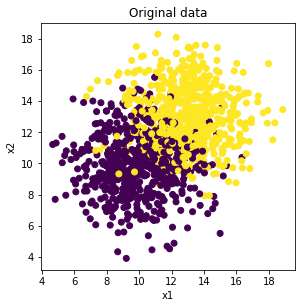

In [62]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original data')
plt.show()

We will split the data into training and testing to see the trees' behaviour as we change the max-depth of the tree.

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

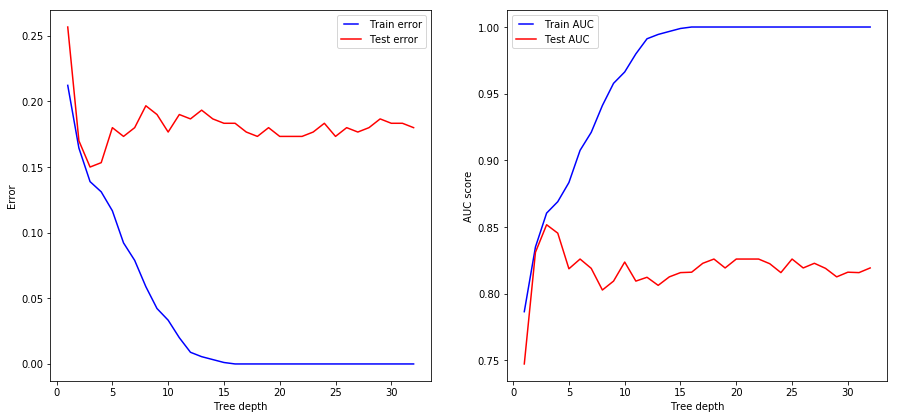

In [112]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
train_errors =[]
test_errors = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_pred = clf.predict(x_train)
    
    #Another way to obtain accuracy and some other interesting metrics
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    error = sum(train_pred != y_train)/len(y_train)
    train_results.append(roc_auc)
    train_errors.append(error)
    
    y_pred = clf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    error = sum(y_pred != y_test)/len(y_test)
    
    test_errors.append(error)
    test_results.append(roc_auc)

plt.rcParams['figure.figsize'] = [15, 15]
#plt.suptitle("Errors (left) and accuracy (right) as a function of a tree's depth")
plt.subplot(221)
line1, = plt.plot(max_depths, train_errors, 'b', label="Train error")
line2, = plt.plot(max_depths, test_errors, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Tree depth')


plt.subplot(222)
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')


plt.show()

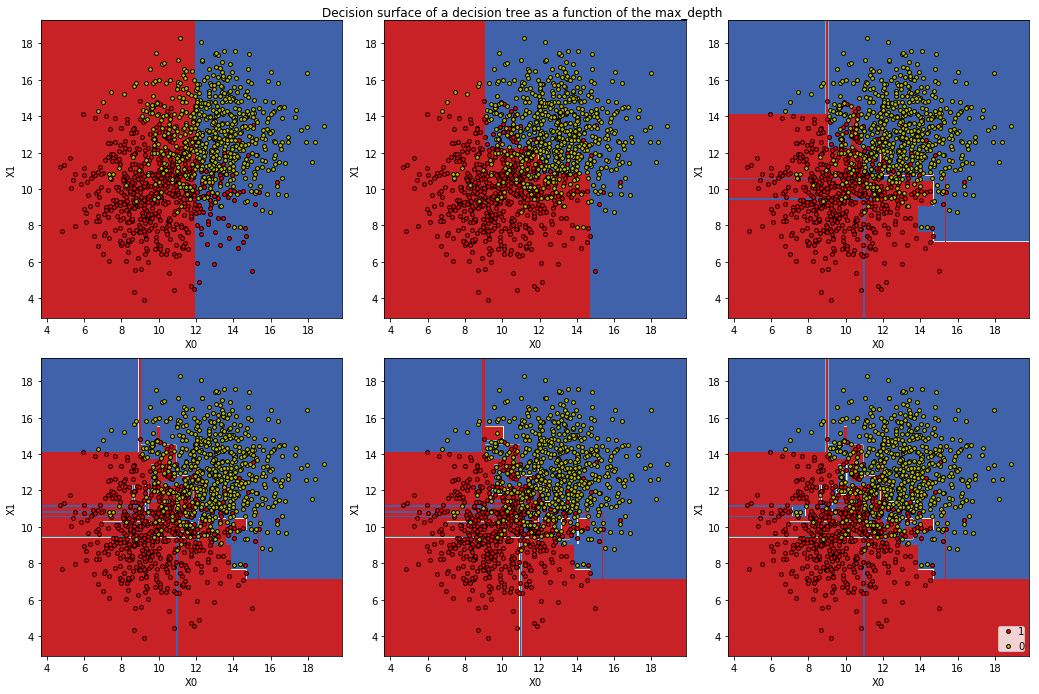

In [115]:
# Plot the decision boundary
plt.rcParams['figure.figsize'] = [15, 10]
max_depths = [1, 3, 6, 10, 12, 15]
plot_colors = "ry"
for pairidx, max_depth in enumerate(max_depths):
    plt.subplot(2, 3, pairidx + 1)
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train, y_train)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel('X0')
    plt.ylabel('X1')

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree as a function of the max_depth")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

#plt.figure()
plt.show()